# Importing Libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Loading Datasets

In [209]:

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [211]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [212]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Label Encoding


In [213]:
sex_label = LabelEncoder()
embarked_label = LabelEncoder()

titanic['Sex'] = sex_label.fit_transform(titanic['Sex'])
sex_map = dict(enumerate(sex_label.classes_))

titanic['Embarked'] = embarked_label.fit_transform(titanic['Embarked'])
embarked_map = dict(enumerate(embarked_label.classes_))

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [214]:
print(f'Sex Mapping -- > {sex_map}')
print(f'Embarked_mapping -- > {embarked_map}')

Sex Mapping -- > {0: 'female', 1: 'male'}
Embarked_mapping -- > {0: 'C', 1: 'Q', 2: 'S'}


In [215]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']

In [216]:
scaled = StandardScaler()

X_scaled = scaled.fit_transform(X)
print(X_scaled)

[[ 0.82737724  0.73769513 -0.56573646 ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.66386103 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25833709 ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.1046374  ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.25833709 ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.20276197 ... -0.47367361 -0.49237783
  -0.67817453]]


In [217]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [218]:

train_data = []
test_data = []

ranged = range(24,30,1)

for i in ranged:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, Y_train)
    X_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(Y_train, X_train_pred)
    train_data.append(train_accuracy)
    
    X_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, X_test_pred)
    test_data.append(test_accuracy)

    print(f"Train {i}: {train_accuracy}")
    print(f"Test {i}: {test_accuracy}")
    print("-"*20,"!","-"*20)



Train 24: 0.824438202247191
Test 24: 0.8156424581005587
-------------------- ! --------------------
Train 25: 0.8216292134831461
Test 25: 0.8100558659217877
-------------------- ! --------------------
Train 26: 0.8174157303370787
Test 26: 0.8100558659217877
-------------------- ! --------------------
Train 27: 0.824438202247191
Test 27: 0.8156424581005587
-------------------- ! --------------------
Train 28: 0.8258426966292135
Test 28: 0.8324022346368715
-------------------- ! --------------------
Train 29: 0.8132022471910112
Test 29: 0.8100558659217877
-------------------- ! --------------------


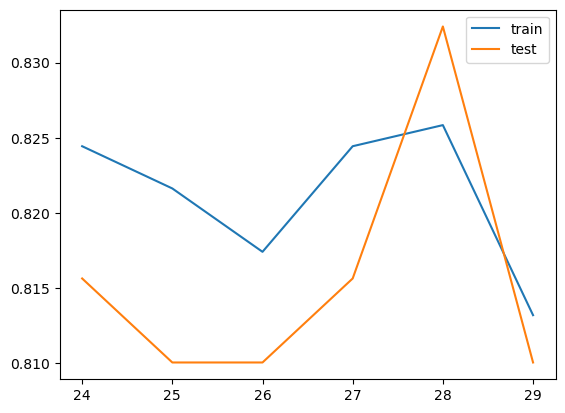

In [219]:
plt.plot(ranged,train_data)
plt.plot(ranged,test_data)
plt.legend(['train','test'])
plt.show()

In [220]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train, Y_train)
X_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(Y_train, X_train_pred)
train_data.append(train_accuracy)

X_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_pred)
test_data.append(test_accuracy)
print(f"Train {i}: {train_accuracy}")
print(f"Test {i}: {test_accuracy}")
print("-"*20,"!","-"*20)


Train 29: 0.8132022471910112
Test 29: 0.8100558659217877
-------------------- ! --------------------


In [221]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred,target_names=['Dead','Alive']))

print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred,target_names=['Dead','Alive']))


Classification Report - Training Set:
              precision    recall  f1-score   support

        Dead       0.83      0.88      0.85       439
       Alive       0.79      0.70      0.74       273

    accuracy                           0.81       712
   macro avg       0.81      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712

Classification Report - Testing Set:
              precision    recall  f1-score   support

        Dead       0.82      0.89      0.85       110
       Alive       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



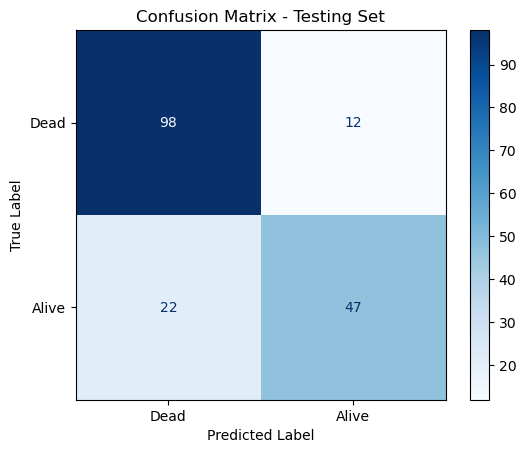

In [222]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
param_grid = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
}

In [ ]:

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,                       
    scoring='accuracy',
    n_jobs=-1,                  
    verbose=2                   
)


grid_search.fit(X_train, Y_train)


Fitting 2 folds for each of 14400 candidates, totalling 28800 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': range(1, 31), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [225]:

print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")



Best Parameters from GridSearchCV: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 6, 'p': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8216


In [ ]:

best_knn = grid_search.best_estimator_

X_train_pred_best = best_knn.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:}")

X_test_pred_best = best_knn.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:}")


Train Accuracy with Best Parameters: 0.8399
Test Accuracy with Best Parameters: 0.7989


In [227]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Dead','Alive']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Dead','Alive']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

        Dead       0.83      0.93      0.88       439
       Alive       0.86      0.70      0.77       273

    accuracy                           0.84       712
   macro avg       0.85      0.81      0.82       712
weighted avg       0.84      0.84      0.84       712

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

        Dead       0.79      0.92      0.85       110
       Alive       0.82      0.61      0.70        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179



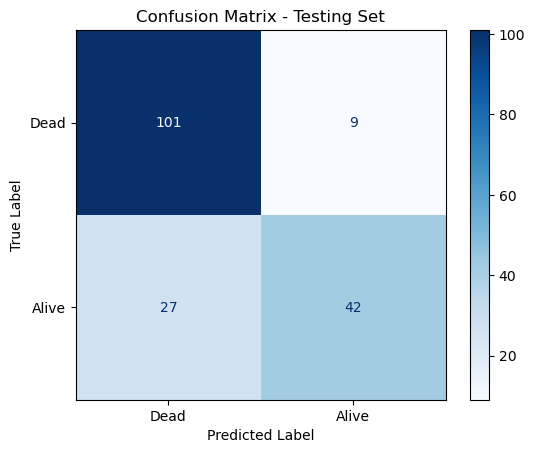

In [228]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
